## Importing the Required Libraries

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

In [2]:
rv = pd.read_csv("F:\pandas\RestaurantVisitors.csv" , index_col = "date" , parse_dates= True)

In [3]:
rv.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


#### Checking the Nulls

In [4]:
rv.isnull().sum()

weekday          0
holiday          0
holiday_name     0
rest1           39
rest2           39
rest3           39
rest4           39
total           39
dtype: int64

#### Dropping the nulls

In [5]:
rv = rv.dropna()

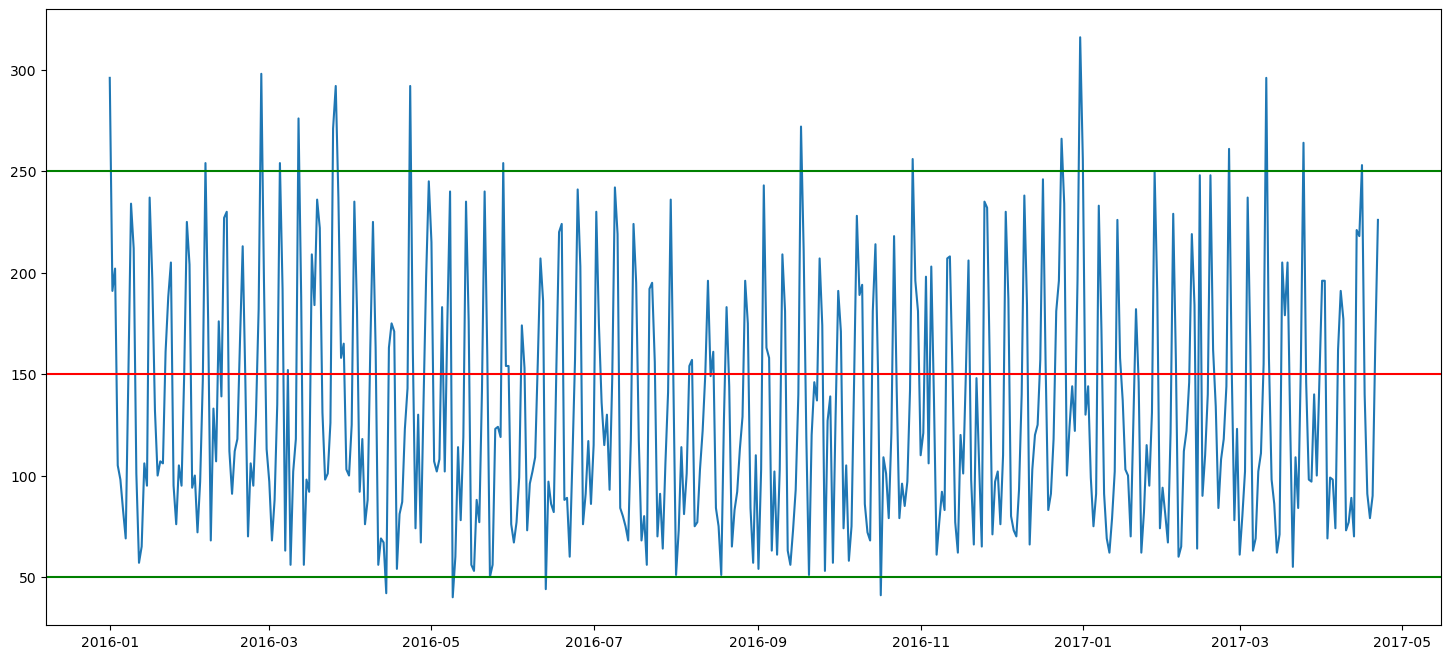

In [6]:
plt.figure(figsize= (18,8))
plt.plot(rv.total)
plt.axhline(y= 150 , color = "r")
plt.axhline(y= 250 , color = "g")
plt.axhline(y= 50 , color = "g")

In [7]:
# seasonal  (its seasonal with a time period of a week 7 days)

# trends (no trend)

# stationary (almost stationary)

In [8]:
ho_index = rv[rv.holiday == 1].index
ho_index

DatetimeIndex(['2016-01-01', '2016-01-18', '2016-02-02', '2016-02-14',
               '2016-02-15', '2016-03-17', '2016-03-25', '2016-03-27',
               '2016-03-28', '2016-05-05', '2016-05-08', '2016-05-30',
               '2016-06-19', '2016-07-04', '2016-09-05', '2016-10-10',
               '2016-10-31', '2016-11-11', '2016-11-24', '2016-11-25',
               '2016-12-24', '2016-12-25', '2016-12-31', '2017-01-01',
               '2017-01-16', '2017-02-02', '2017-02-14', '2017-02-20',
               '2017-03-17', '2017-04-14', '2017-04-16', '2017-04-17'],
              dtype='datetime64[ns]', name='date', freq=None)

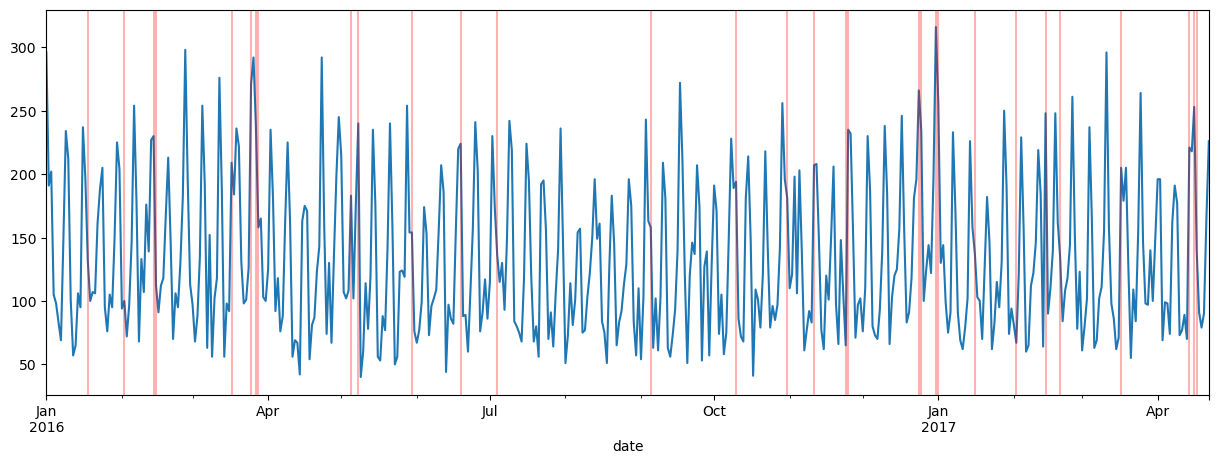

In [9]:
ax = rv["total"].plot(figsize = (15, 5))
for day in ho_index:
    ax.axvline(x = day , color = "red" , alpha =0.3)
    
    # this graph is showing that holiday is impacting the number of people visiting the restaurant
    # normally with holiday there is sudeen increase
    
    # so sarima model may not be sufficient and SARIMAX has to be used

This graph is showing that holiday is impacting the number of people visiting the restaurant
normally with holiday there is sudeen increase
so sarima model may not be sufficient and SARIMAX has to be used

#### Using Seasonal Decompose Understanding the underlying patterns and trends

In [45]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [46]:
rv_seasonal = seasonal_decompose(rv.total)

In [47]:
seasonal = seasonal_decompose(rv.total)

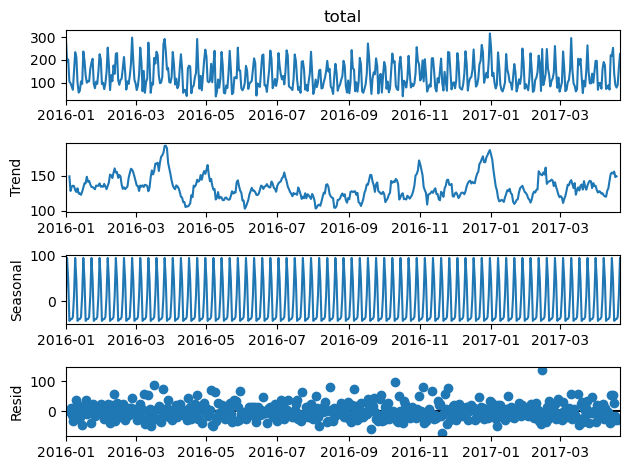

In [48]:
seasonal.plot();

#### Normality Test

In [39]:
def adf_test_normality(series):
    from statsmodels.tsa.stattools import adfuller
    adfuller(series)
    p_value = adfuller(series)[1]
    print('pvalue=',p_value)
    if p_value<0.05:
        print('p_value < 0.05')
        print('series is stationary')
    else:
        print('p_value > 0.05')
        print('series is not stationary')

In [40]:
adf_test_normality(rv.total)

pvalue= 1.319377094694154e-06
p_value < 0.05
series is stationary


### Building the model using AUTO ARIMA and SARIMA

In [10]:
import pmdarima

from pmdarima import auto_arima

In [11]:
auto_arima(rv["total"], seasonal = True , m = 7 , maxiter= 75)

# auto_arima tries many different combination 

ARIMA(maxiter=75, order=(1, 0, 0), scoring_args={}, seasonal_order=(2, 0, 0, 7),
      suppress_warnings=True)

In [12]:
rv_train = rv.iloc[0:450]
rv_test = rv.iloc[450::]

In [13]:
rv_train.shape

(450, 8)

In [14]:
rv_test.shape

(28, 8)

In [16]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [17]:
model_sarima_rv = SARIMAX(rv_train["total"] , order = (1,0,0) , seasonal_order= (1,0,1,7))

C:\Users\YASH KUMAR\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\YASH KUMAR\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


#### Model Created 

In [18]:
results_rv = model_sarima_rv.fit()

In [19]:
pred_rv_sarima = results_rv.predict(start = 450 , end = 477)

In [20]:
pred_rv_sarima

2017-03-26    180.790139
2017-03-27     91.785333
2017-03-28     95.815671
2017-03-29     95.446022
2017-03-30     96.922536
2017-03-31    145.252904
2017-04-01    232.336413
2017-04-02    174.631244
2017-04-03     90.584845
2017-04-04     95.576316
2017-04-05     95.393395
2017-04-06     96.906045
2017-04-07    145.239586
2017-04-08    232.317493
2017-04-09    174.617206
2017-04-10     90.577584
2017-04-11     95.568666
2017-04-12     95.385761
2017-04-13     96.898291
2017-04-14    145.227964
2017-04-15    232.298904
2017-04-16    174.603234
2017-04-17     90.570336
2017-04-18     95.561019
2017-04-19     95.378129
2017-04-20     96.890537
2017-04-21    145.216344
2017-04-22    232.280316
Freq: D, Name: predicted_mean, dtype: float64

In [41]:
import tabulate as tb

In [43]:
df = pd.DataFrame()
df["Actual"] = rv_test["total"]
df["Predicted"] = pred_rv_sarima
df["Error"] = df.Actual - df.Predicted
df["Percentage error"] = np.abs(df.Error)*100 / df.Actual

print(tb.tabulate(df , headers= "keys" , tablefmt = "fancy_grid"))

╒═════════════════════╤══════════╤═════════════╤═══════════╤════════════════════╕
│ date                │   Actual │   Predicted │     Error │   Percentage error │
╞═════════════════════╪══════════╪═════════════╪═══════════╪════════════════════╡
│ 2017-03-26 00:00:00 │      146 │    180.79   │ -34.7901  │           23.8289  │
├─────────────────────┼──────────┼─────────────┼───────────┼────────────────────┤
│ 2017-03-27 00:00:00 │       98 │     91.7853 │   6.21467 │            6.3415  │
├─────────────────────┼──────────┼─────────────┼───────────┼────────────────────┤
│ 2017-03-28 00:00:00 │       97 │     95.8157 │   1.18433 │            1.22096 │
├─────────────────────┼──────────┼─────────────┼───────────┼────────────────────┤
│ 2017-03-29 00:00:00 │      140 │     95.446  │  44.554   │           31.8243  │
├─────────────────────┼──────────┼─────────────┼───────────┼────────────────────┤
│ 2017-03-30 00:00:00 │      100 │     96.9225 │   3.07746 │            3.07746 │
├───────────────

In [24]:
MSE = np.mean(np.square(df.error))
MSE

884.2630964596125

In [25]:
MAPE = np.mean(np.abs(df.percentage))
MAPE

16.036833120456016

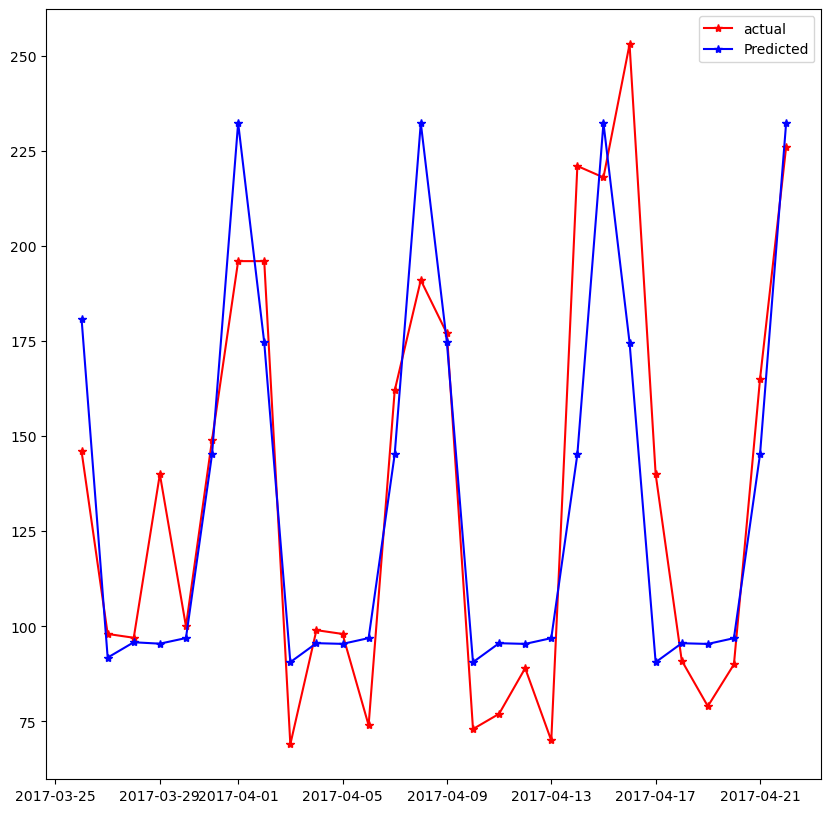

In [26]:
plt.figure(figsize= (10,10))
plt.plot(rv_test["total"] , color = "r" , marker = "*" , label = "actual")
plt.plot(pred_rv_sarima , color = "b" , marker = "*" , label = "Predicted" )
plt.legend()

# year on year its in uptrend and with a year its seasonal

#### Model is not doing good for holidays its doing under predictions for holidays

#### so SARIMAX is needed to handle holidays

In [28]:
model2 = SARIMAX(rv_train["total"] , order = (1,0,0) ,
                 seasonal_order=(1,0,1,7),
                exog = rv_train[["holiday"]])

# whenever you pass any column in exog you need to pass it in the form of data frame

C:\Users\YASH KUMAR\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\YASH KUMAR\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [29]:
results2 = model2.fit()

C:\Users\YASH KUMAR\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [30]:
pred_rv2 = results2.predict(start = 450 , end = 477 , exog = rv_test[["holiday"]] )
pred_rv2

2017-03-26    176.343082
2017-03-27     81.875948
2017-03-28     93.026474
2017-03-29     95.457758
2017-03-30     92.481796
2017-03-31    138.963719
2017-04-01    228.791354
2017-04-02    169.409045
2017-04-03     80.509045
2017-04-04     92.753127
2017-04-05     95.399542
2017-04-06     92.466103
2017-04-07    138.953684
2017-04-08    228.777791
2017-04-09    169.399221
2017-04-10     80.504399
2017-04-11     92.747789
2017-04-12     95.394053
2017-04-13     92.460783
2017-04-14    207.816356
2017-04-15    228.764631
2017-04-16    238.260141
2017-04-17    149.370432
2017-04-18     92.742454
2017-04-19     95.388566
2017-04-20     92.455465
2017-04-21    138.937698
2017-04-22    228.751471
Freq: D, Name: predicted_mean, dtype: float64

In [44]:
df2 = pd.DataFrame()
df2["Actual"] = rv_test["total"]
df2["Predicted"]= pred_rv2
df2["error"] = df2["Actual"] - df2["Predicted"]
df2["percentage"] = np.abs(df2["error"] *100 / df2["Actual"])
print(tb.tabulate(df2 , headers= "keys" , tablefmt = "fancy_grid"))

╒═════════════════════╤══════════╤═════════════╤═══════════╤══════════════╕
│ date                │   Actual │   Predicted │     error │   percentage │
╞═════════════════════╪══════════╪═════════════╪═══════════╪══════════════╡
│ 2017-03-26 00:00:00 │      146 │    176.343  │ -30.3431  │     20.7829  │
├─────────────────────┼──────────┼─────────────┼───────────┼──────────────┤
│ 2017-03-27 00:00:00 │       98 │     81.8759 │  16.1241  │     16.4531  │
├─────────────────────┼──────────┼─────────────┼───────────┼──────────────┤
│ 2017-03-28 00:00:00 │       97 │     93.0265 │   3.97353 │      4.09642 │
├─────────────────────┼──────────┼─────────────┼───────────┼──────────────┤
│ 2017-03-29 00:00:00 │      140 │     95.4578 │  44.5422  │     31.8159  │
├─────────────────────┼──────────┼─────────────┼───────────┼──────────────┤
│ 2017-03-30 00:00:00 │      100 │     92.4818 │   7.5182  │      7.5182  │
├─────────────────────┼──────────┼─────────────┼───────────┼──────────────┤
│ 2017-03-31

In [32]:
MSE2 = np.mean(np.square(df2.error))
MSE2

359.43911974986577

In [33]:
MAPE2 = np.mean(np.abs(df2.percentage))
MAPE2



12.229373587863334

#### Plot Between Actual and Predicted

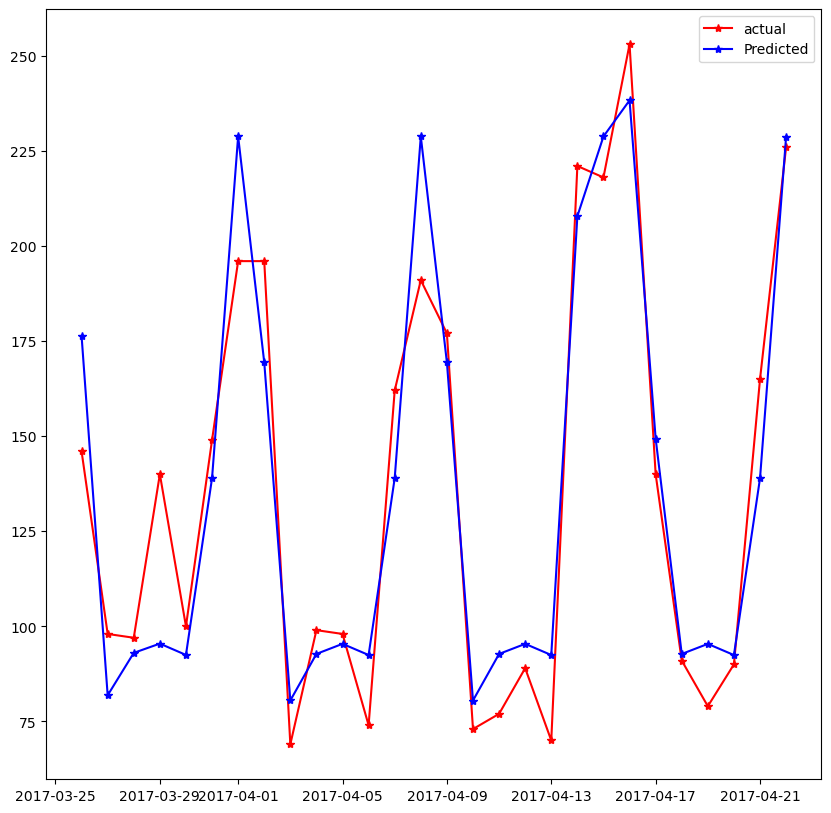

In [34]:
plt.figure(figsize= (10,10))
plt.plot(rv_test["total"] , color = "r" , marker = "*" , label = "actual")
plt.plot(pred_rv2 , color = "b" , marker = "*" , label = "Predicted" )
plt.legend()

# year on year its in uptrend and with a year its seasonal

### Conclusion

Through the analysis of the restaurant visitors dataset provides valuable insights that can be used to improve the performance and profitability of restaurants. By using these insights to make informed decisions, restaurant owners and managers can better meet the changing needs and preferences of their customers and stay ahead of the competition